#Exploratory Data Analysis



###Imports and Downloads

In [1]:
import numpy as np
import pandas as pd 
import csv,nltk,random,pickle
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer,SnowballStemmer
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split,ShuffleSplit,GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
import pickle
import joblib
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Exploratory Data Analysis

In [3]:
#Read original dataset
af=pd.read_csv('/content/drive/MyDrive/Ml Project/Train.zip')

Dataset Count and Duplicate Entries

In [84]:
def dup(n):
  #Reading Dataset
  df=af[:n]

  #Getting duplicate questions
  duplicate_pairs = df.sort_values('Title', ascending=False).duplicated('Title')
  df = df[~duplicate_pairs]

  #Duplicate information
  print("Total number of duplicate questions :", n-df.shape[0])
  print("Daraframe shape after duplicate removal :", df.shape)

In [34]:
def return_tags(n):
  #Reading Dataset
  df=af[:n]

  #Removing duplicates and Getting only Tags
  duplicate_pairs = df.sort_values('Title', ascending=False).duplicated('Title')
  df = df[~duplicate_pairs]["Tags"].to_frame()

  #Adding tag_count as column
  data_tags_count = df["Tags"].apply(lambda x: len(x.split(" ")))
  df['tag_count'] = data_tags_count

  #returning dataframe with only tags, tag_count
  return df

Distribution of Tags per Question

In [37]:
def distribution_tags_question(n):
  #Reading dataset with tags, tag_count
  df = return_tags(n)

  #Basic data analysis based on tags
  print("Maximum number of tags per question = "+str(max(df['tag_count'])))
  print("Minimum number of tags per question = "+str(min(df['tag_count'])))
  print("Avg number of tags per question = "+str(sum(df['tag_count'])/len(df['tag_count'])))

  #Plotting distribution of Number of Tags per Question
  plt.clf()
  sns.countplot(x="tag_count", data=df)
  plt.show()

Frequency of top 30 tags

In [72]:
def freq_top_30(n, flag = False):
  #Reading dataset with tags, tag_count
  df = return_tags(n).to_numpy()

  #Get frequency of each single tag
  tag_frq = dict()
  for i in range(df.shape[0]):
    arr = list(df[i,0].split())
    for j in arr:
      tag_frq[j] = tag_frq.get(j, 0) + 1

  #Sort according to frequency
  tag_frq = dict(sorted(tag_frq.items(), key=lambda item: item[1],reverse=True))

  #Convert to sorted dataframe
  tag_frq_df = {"Tag":list(tag_frq.keys()), "Frequency": list(tag_frq.values())}
  tag_frq_df = pd.DataFrame(data = tag_frq_df)

  if (flag == False):

    #Print top 10
    print(tag_frq_df.head(10))

    #Plot top 20 tags
    plt.clf()
    tag_frq_df.head(30).plot(x = 'Tag', y = 'Frequency', kind = 'bar', grid = True, title = "Frequency of top 30 tags")
    plt.show()
  else:
    #Use generated dataframe in other functions
    return tag_frq

Word Cloud

In [74]:
def word_cloud(n):

  #Recieve dctionary with tags and their frequencies
  tag_frq = freq_top_30(n, True)

  #Word Cloud formation
  worcloudPlot = WordCloud(background_color = "white", width = 1500, height = 1000)
  worcloudPlot.generate_from_frequencies(frequencies = tag_frq)
  plt.imshow(worcloudPlot, interpolation="bilinear")
  plt.axis("off")
  plt.figure(figsize=(30,20))
  plt.show()

Number of Tags vs Number of Questions covered

In [82]:
def tags_to_consider(n, df):
  tag_i_sum = df.sum(axis=0).tolist()[0]
  sorted_tags_i = sorted(range(len(tag_i_sum)), key=lambda i: tag_i_sum[i], reverse=True)
  yn_multilabel = df[:,sorted_tags_i[:n]]
  return yn_multilabel

def questions_covered_fn(n, df):
  yn_multilabel = tags_to_consider(n, df)
  x = yn_multilabel.sum(axis = 1)
  return (np.count_nonzero(x == 0))

def plot_num_vs_ques(n):

  #reading preprocessed file
  filename = '/content/drive/MyDrive/Ml Project/preprocessed_data/preprocessed_'+str(n)+ 'k.csv' 
  df = pd.read_csv(filename)

  #Vectorization of the dataset
  vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
  y_ml = vectorizer.fit_transform(df['Tags'])

  #Counting percentage of questions
  ques = []
  total_tags = y_ml.shape[1]
  count = df.shape[0]
  for i in range(100, total_tags, 100):
    ques.append(np.round(((count - questions_covered_fn(i, y_ml))/count)*100,3))

  #Plotting
  plt.clf()
  plt.plot(np.arange(100,total_tags, 100),ques)
  plt.title("Number of Tags vs Number of Questions covered")
  plt.xlabel("Number of tags")
  plt.ylabel("Number of questions covered partially")
  plt.grid()
  plt.show()

Total number of duplicate questions : 4
Daraframe shape after duplicate removal : (9996, 4)
Maximum number of tags per question = 5
Minimum number of tags per question = 1
Avg number of tags per question = 2.916466586634654


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


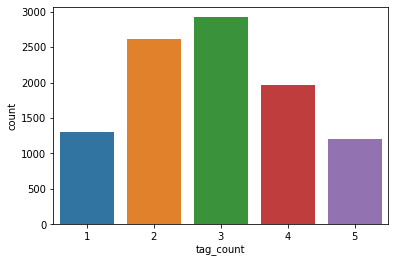

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


          Tag  Count
0          c#    778
1        java    703
2         php    700
3  javascript    624
4     android    518
5      jquery    504
6         c++    333
7     asp.net    309
8        .net    302
9      python    300


<Figure size 432x288 with 0 Axes>

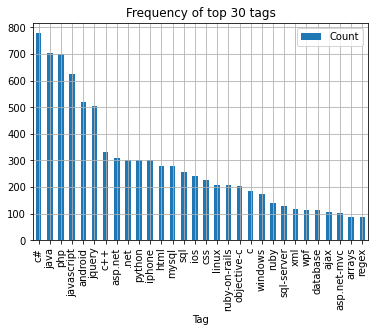

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


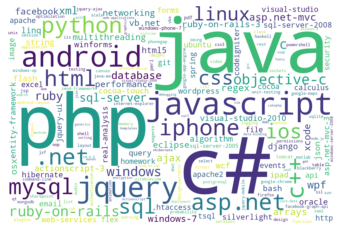

<Figure size 2160x1440 with 0 Axes>

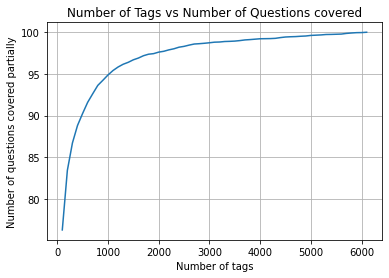

Total number of duplicate questions : 19
Daraframe shape after duplicate removal : (19981, 4)
Maximum number of tags per question = 5
Minimum number of tags per question = 1
Avg number of tags per question = 2.8898453530854313


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


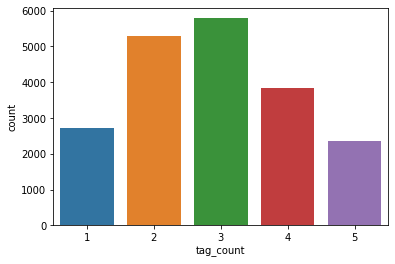

          Tag  Count
0          c#   1533
1        java   1364
2         php   1327
3  javascript   1243
4     android   1036
5      jquery    989
6         c++    657
7      iphone    625
8      python    622
9     asp.net    602


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


<Figure size 432x288 with 0 Axes>

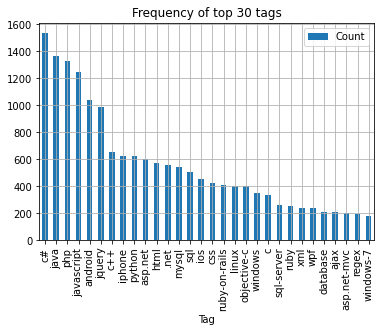

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


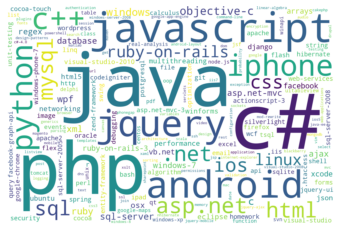

<Figure size 2160x1440 with 0 Axes>

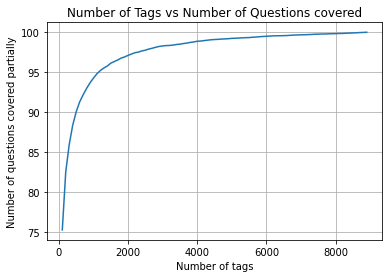

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


Total number of duplicate questions : 50
Daraframe shape after duplicate removal : (29950, 4)
Maximum number of tags per question = 5
Minimum number of tags per question = 1
Avg number of tags per question = 2.8881135225375627


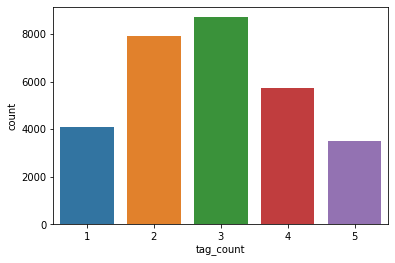

          Tag  Count
0          c#   2271
1        java   2057
2         php   1963
3  javascript   1899
4     android   1579
5      jquery   1478
6         c++    994
7      iphone    946
8      python    944
9     asp.net    909


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


<Figure size 432x288 with 0 Axes>

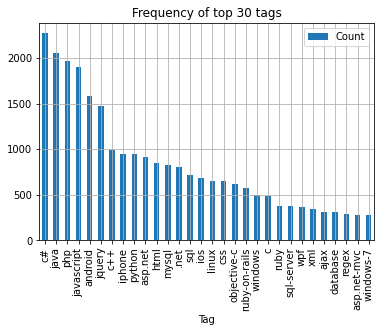

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


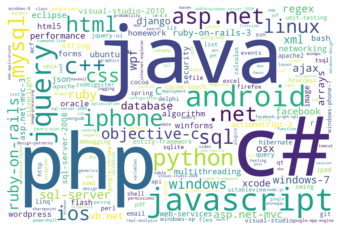

<Figure size 2160x1440 with 0 Axes>

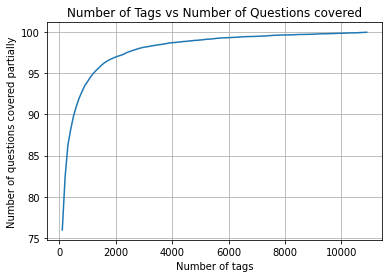

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


Total number of duplicate questions : 107
Daraframe shape after duplicate removal : (39893, 4)
Maximum number of tags per question = 5
Minimum number of tags per question = 1
Avg number of tags per question = 2.8854184944727144


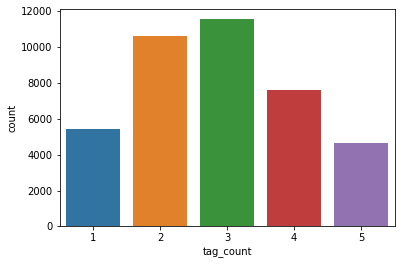

          Tag  Count
0          c#   3074
1        java   2773
2         php   2559
3  javascript   2450
4     android   2119
5      jquery   1942
6         c++   1323
7      iphone   1246
8      python   1223
9     asp.net   1187


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


<Figure size 432x288 with 0 Axes>

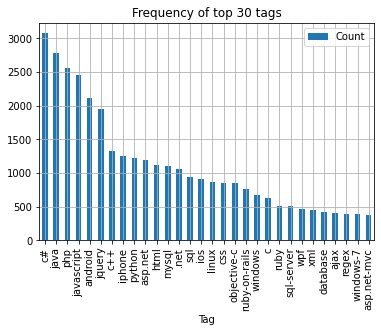

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


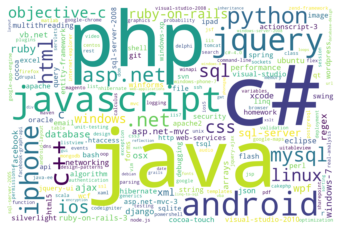

<Figure size 2160x1440 with 0 Axes>

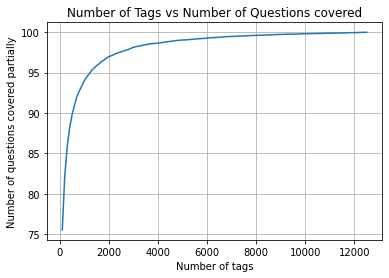

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


Total number of duplicate questions : 159
Daraframe shape after duplicate removal : (49841, 4)
Maximum number of tags per question = 5
Minimum number of tags per question = 1
Avg number of tags per question = 2.885656387311651


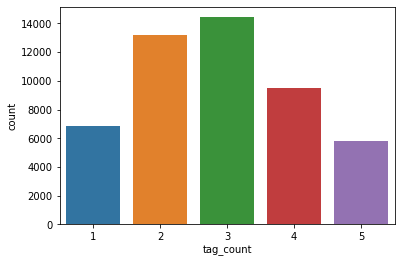

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


          Tag  Count
0          c#   3845
1        java   3397
2         php   3231
3  javascript   3089
4     android   2673
5      jquery   2423
6         c++   1623
7      iphone   1538
8      python   1525
9     asp.net   1478


<Figure size 432x288 with 0 Axes>

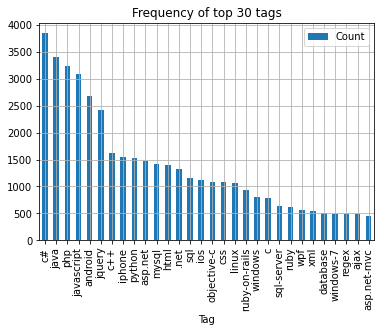

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


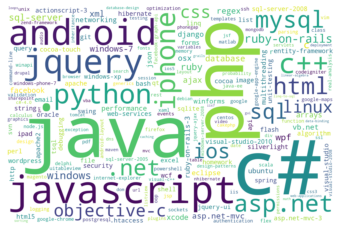

<Figure size 2160x1440 with 0 Axes>

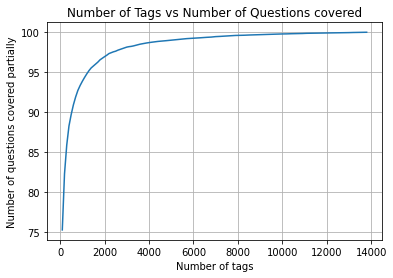

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


Total number of duplicate questions : 227
Daraframe shape after duplicate removal : (59773, 4)
Maximum number of tags per question = 5
Minimum number of tags per question = 1
Avg number of tags per question = 2.8852826527027253


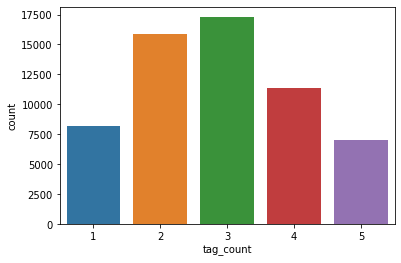

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


          Tag  Count
0          c#   4623
1        java   4078
2         php   3888
3  javascript   3674
4     android   3211
5      jquery   2929
6         c++   1939
7      iphone   1848
8      python   1818
9     asp.net   1737


<Figure size 432x288 with 0 Axes>

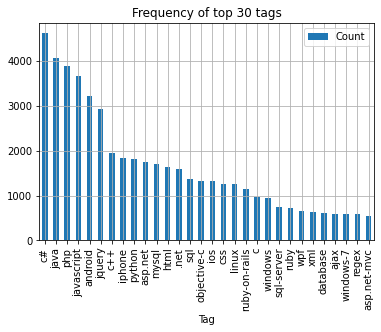

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


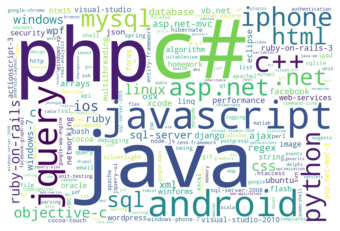

<Figure size 2160x1440 with 0 Axes>

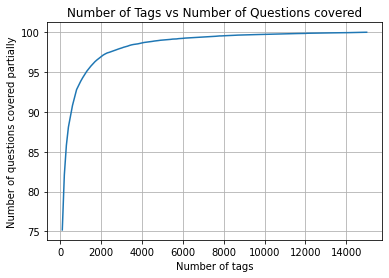

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


Total number of duplicate questions : 304
Daraframe shape after duplicate removal : (69696, 4)
Maximum number of tags per question = 5
Minimum number of tags per question = 1
Avg number of tags per question = 2.8839818640955004


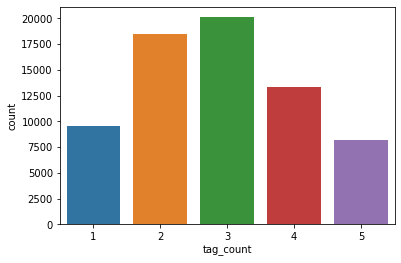

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


          Tag  Count
0          c#   5396
1        java   4775
2         php   4549
3  javascript   4280
4     android   3740
5      jquery   3429
6         c++   2276
7      iphone   2158
8      python   2123
9     asp.net   2029


<Figure size 432x288 with 0 Axes>

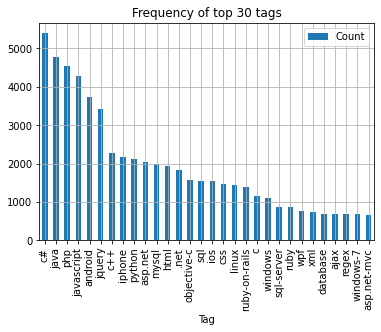

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


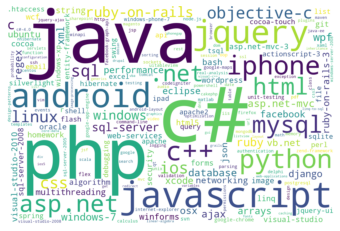

<Figure size 2160x1440 with 0 Axes>

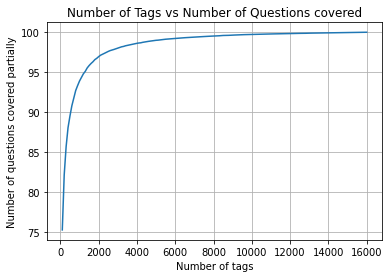

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


Total number of duplicate questions : 403
Daraframe shape after duplicate removal : (79597, 4)
Maximum number of tags per question = 5
Minimum number of tags per question = 1
Avg number of tags per question = 2.8839026596479767


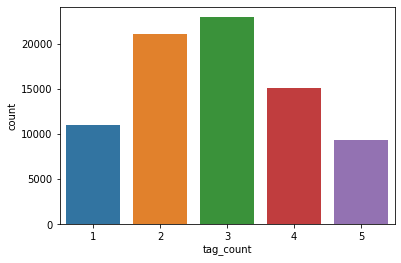

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


          Tag  Count
0          c#   6194
1        java   5424
2         php   5228
3  javascript   4854
4     android   4249
5      jquery   3913
6         c++   2614
7      iphone   2453
8      python   2441
9     asp.net   2309


<Figure size 432x288 with 0 Axes>

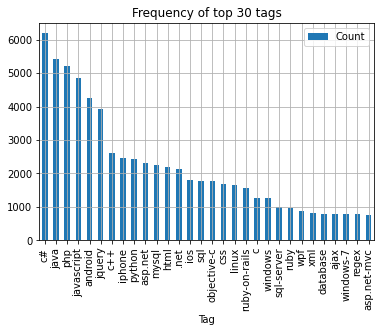

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


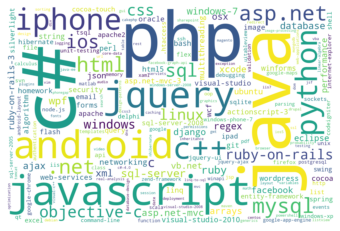

<Figure size 2160x1440 with 0 Axes>

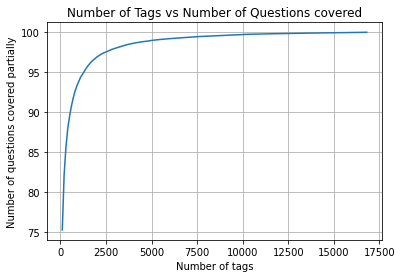

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


Total number of duplicate questions : 499
Daraframe shape after duplicate removal : (89501, 4)
Maximum number of tags per question = 5
Minimum number of tags per question = 1
Avg number of tags per question = 2.8827499134087886


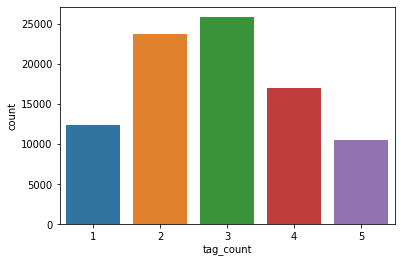

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


          Tag  Count
0          c#   6974
1        java   6090
2         php   5884
3  javascript   5478
4     android   4788
5      jquery   4415
6         c++   2915
7      python   2752
8      iphone   2747
9     asp.net   2640


<Figure size 432x288 with 0 Axes>

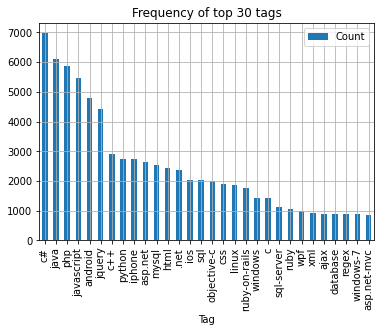

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


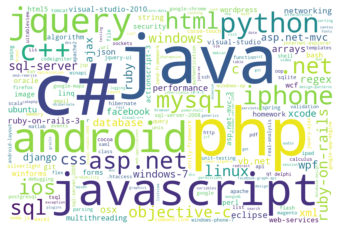

<Figure size 2160x1440 with 0 Axes>

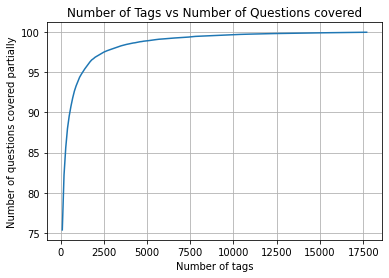

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


Total number of duplicate questions : 595
Daraframe shape after duplicate removal : (99405, 4)
Maximum number of tags per question = 5
Minimum number of tags per question = 1
Avg number of tags per question = 2.8830239927569035


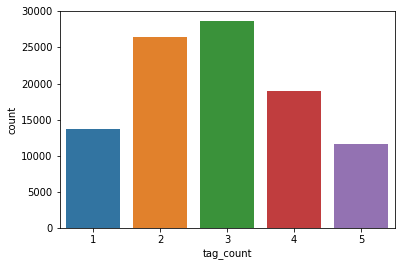

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


          Tag  Count
0          c#   7745
1        java   6751
2         php   6543
3  javascript   6102
4     android   5287
5      jquery   4924
6         c++   3257
7      python   3060
8      iphone   3037
9     asp.net   2918


<Figure size 432x288 with 0 Axes>

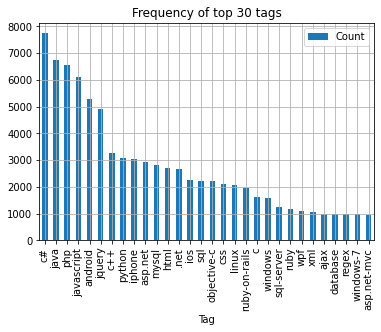

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


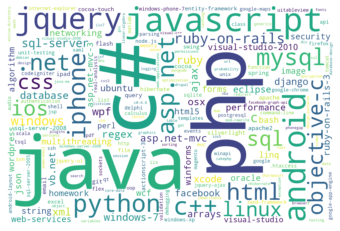

<Figure size 2160x1440 with 0 Axes>

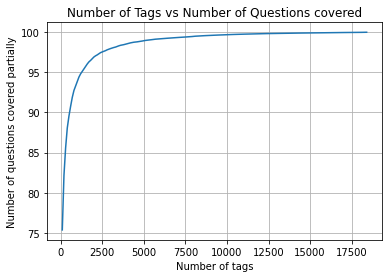

In [85]:
for i in range(10000,100001,10000):
  print("Dataset size -", i)
  dup(i)
  distribution_tags_question(i)
  freq_top_30(i)
  word_cloud(i)
  plot_num_vs_ques(i)